# KNN Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def make_confusion_matrix(confusion): 
    tn, fp, fn, tp = confusion.flatten()
    confusion_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]}, 
                                index=['a_0', 'a_1', 'total_prediction'])
    return confusion_df

In [2]:
df = pd.read_csv('data/Data/white_wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [8]:
df['label'] = np.where(df['quality'] > 6, 1, 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


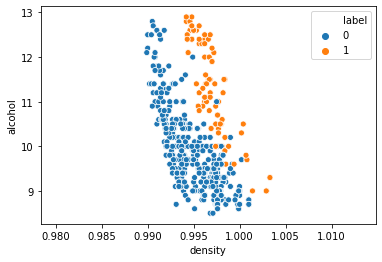

In [11]:
sns.scatterplot(x='density', y='alcohol', data=df, hue='label')
plt.show()

In [13]:
df[['alcohol', 'density']].isna().sum()

alcohol    1
density    0
dtype: int64

In [14]:
df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)

In [16]:
df[['alcohol', 'density']].isna().sum()

alcohol    0
density    0
dtype: int64

In [18]:
X = df[['alcohol', 'density']]
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2020)

>### Without Scaling

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.9038461538461539


>### With Scaling
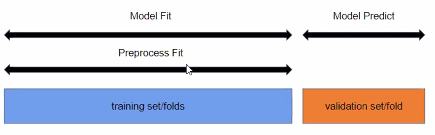

- fit hanya di x
- transform pada training dan validation

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train.head()

,alcohol,density
325,10.5,0.9946
273,9.0,0.9949
287,9.0,1.0029
342,9.1,0.9962
323,10.4,0.9946


In [27]:
X_train_scaled[:5]

array([[0.45454545, 0.34586466],
       [0.11363636, 0.36842105],
       [0.11363636, 0.96992481],
       [0.13636364, 0.46616541],
       [0.43181818, 0.34586466]])

In [24]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.9038461538461539


In [29]:
X_train.describe()

,alcohol,density
count,416.000000,416.000000
mean,10.106056,0.995420
std,1.075572,0.002634
min,8.500000,0.990000
25%,9.300000,0.993400
50%,9.900000,0.995400
75%,10.700000,0.997400
max,12.900000,1.003300


In [31]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [32]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_scaled))

Accuracy score:  0.9807692307692307


In [33]:
def make_confusion_matrix(confusion): 
    tn, fp, fn, tp = confusion.flatten()
    confusion_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]}, 
                                index=['a_0', 'a_1', 'total_prediction'])
    return confusion_df

In [35]:
make_confusion_matrix(confusion_matrix(y_test, y_pred))

,p_0,p_1,total_actual
a_0,79,5,84
a_1,5,15,20
total_prediction,84,20,104


In [36]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_scaled))

,p_0,p_1,total_actual
a_0,83,1,84
a_1,1,19,20
total_prediction,84,20,104


The accuracy improved from 0.90 to 0.98 after we applied scaling

>## Choose Factor K

In [38]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0 

for i in k:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_scaled, y_train)
    
    y_pred_train = knn_i.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn_i.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

In [39]:
[testing_accuracies, training_accuracies]

[[0.9711538461538461,
  0.9807692307692307,
  0.9807692307692307,
  0.9711538461538461,
  0.9807692307692307,
  0.9807692307692307,
  0.9711538461538461,
  0.9711538461538461,
  0.9903846153846154,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307,
  0.9807692307692307],
 [0.9975961538461539,
  0.9831730769230769,
  0.9759615384615384,
  0.9711538461538461,
  0.9807692307692307,
  0.9759615384615384,
  0.9783653846153846,
  0.9735576923076923,
  0.9639423076923077,
  0.9567307692307693,
  0.9519230769230769,
  0.9519230769230769,
  0.9471153846153846,
  0.9423076923076923,
  0.9399038461538461]]

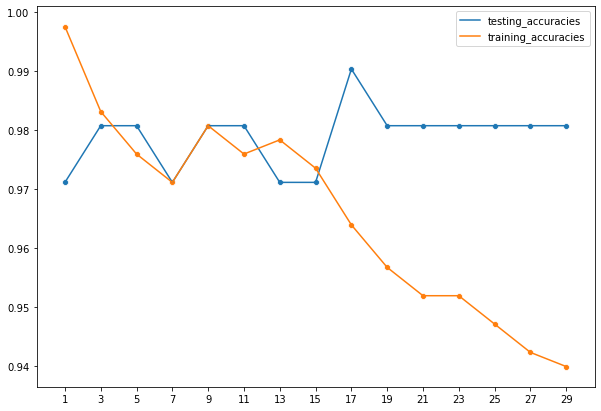

In [44]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)

plt.legend(['testing_accuracies', 'training_accuracies'])
plt.xticks(list(k))

plt.show()

In [42]:
print('best k: ', best_k)
print('accuracy: ', score)

best k:  17
accuracy:  0.9903846153846154


The best factor k for this case is 17 with 99.03%

In [45]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104



# Decision Tree Classifier

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns # sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

def make_confusion_matrix(confusion): 
    tn, fp, fn, tp = confusion.flatten()
    confusion_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]}, 
                                index=['a_0', 'a_1', 'total_prediction'])
    return confusion_df

In [30]:
df = pd.read_csv('data/Data/white_wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


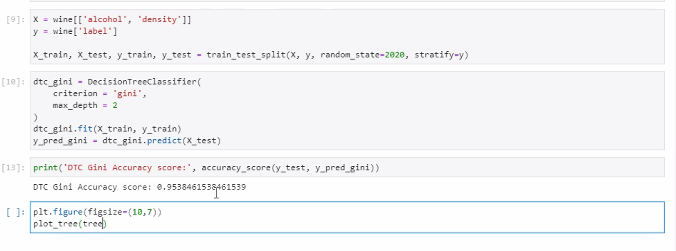

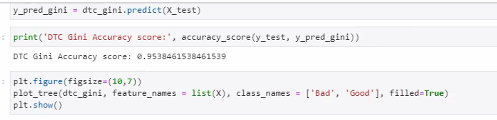

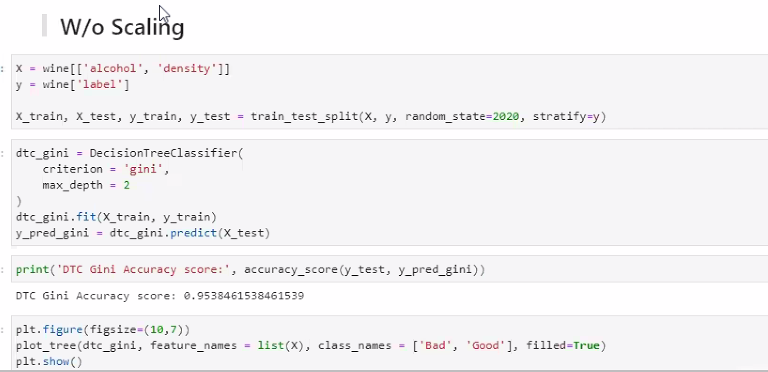

>### Without Scaling

In [31]:
df['label'] = np.where(df['quality']>6,1,0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


In [33]:
X = df[['alcohol', 'density']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)
print(len(X_train), len(X_test), len(y_train), len(y_test))

416 104 416 104


In [34]:
dtc_gini = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2
)

dtc_gini.fit(X_train, y_train)
y_pred_gini = dtc_gini.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

>### With Scaling

In [28]:
mm = MinMaxScaler()
X_scaled_train = mm.fit_transform(X_train)
X_scaled_test = mm.transform(X_test)

In [29]:
dtc_gini_scaled = DecisionTreeClassifier(max_depth=2).fit(X_scaled_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').